# 0Ô∏è‚É£ Inicializar ambiente

In [1]:
# Este bloque es con la finalidad de garantizar que existan todas las dependencias, independiente donde se ejecute este notebook.

import subprocess
import sys
from importlib.metadata import version

# Imprimimos datos del entorno.
print("üü¶ List Environment")
capture = subprocess.run([sys.executable, "--version"],capture_output=True, text=True)
captureText = capture.stdout.strip() or capture.stderr.strip()
print(f"‚úÖ {captureText}")
capture = subprocess.run([sys.executable, "-m", "pip", "--version"] ,capture_output=True, text=True)
captureText = capture.stdout.strip() or capture.stderr.strip()
print(f"‚úÖ {captureText}")
print("", end="\n\n")

print("üü¶ Instalando bibliotecas externas")

print("‚úÖ Instalando numpy")
# Ejecutamos el comando de consola, python -m pip install numpy y la salida de ese comando la mandamos al dispositivo /dev/null para que no salga en pantalla.
# Este comando nos permite instalar la lib numpy con el gestor de paquetes de Python pip.
subprocess.run([sys.executable, "-m", "pip", "install", "numpy"], stdout=subprocess.DEVNULL) 
# Como estamos seguros de la instalaci√≥n de la library procedemos a importar.
import numpy as numpy

# Se hace el mismo paso para todas las libraries que no vienen en los m√≥dulos o paquetes est√°ndar de Python.
print("‚úÖ Instalando pandas")
subprocess.run([sys.executable, "-m", "pip", "install", "pandas"], stdout=subprocess.DEVNULL)
import pandas as pandas

print("‚úÖ Installing matplotlib")
subprocess.run([sys.executable, "-m", "pip", "install", "matplotlib"], stdout=subprocess.DEVNULL)
import matplotlib as matplotlib

print("‚úÖ Installing seaborn")
subprocess.run([sys.executable, "-m", "pip", "install", "seaborn"], stdout=subprocess.DEVNULL)
import seaborn as sns

print("‚úÖ Installing tabulate") # Revisar Python Tabulate: A Full Guide - https://www.datacamp.com/tutorial/python-tabulate
subprocess.run([sys.executable, "-m", "pip", "install", "tabulate"], stdout=subprocess.DEVNULL)
from tabulate import tabulate 

print("‚úÖ Installing pillow")
subprocess.run([sys.executable, "-m", "pip", "install", "pillow"], stdout=subprocess.DEVNULL)
import PIL as pillow

print("‚úÖ Installing requests")
subprocess.run([sys.executable, "-m", "pip", "install", "requests"], stdout=subprocess.DEVNULL)
import requests


# Importando otras bibliotecas(libraries)
import matplotlib.pyplot as plt
import datetime
import random

üü¶ List Environment
‚úÖ Python 3.13.5
‚úÖ pip 25.2 from c:\Users\mcsal\AppData\Local\Programs\Python\Python313\Lib\site-packages\pip (python 3.13)


üü¶ Instalando bibliotecas externas
‚úÖ Instalando numpy
‚úÖ Instalando pandas
‚úÖ Installing matplotlib
‚úÖ Installing seaborn
‚úÖ Installing tabulate
‚úÖ Installing pillow
‚úÖ Installing requests


# 1Ô∏è‚É£ Generar Dataset

In [2]:
# Estas constantes permite modificar el experimento. Modificar a conveniencia del tester.
DATA_SIZE = 1000  # N√∫mero total de registros del dataset(DataFrame) a generar.
PRODUCT_QUANTITY = 1000  # N√∫mero total de productos a generar.
CUSTOMER_QUANTITY = 1000  # N√∫mero total de clientes a generar.
TRANSACTION_MAX_ITEMS = (
    20  # N√∫mero m√°ximo de items de venta de productos en una transacci√≥n a generar.
)
POSITIVE_NUMBER_THRESHOLD = 90  # Umbral para generar un valor num√©rico positivo, si es menor o igual a 90 se toma el valor positivo y si es mayor se toma otro valor.
NOT_NULL_VALUE_THRESHOLD = 90  # Umbral para generar un valor no nulo, si es menor o igual a 90 se toma el valor no nulo y si es mayor se toma nulo(None).
MAX_PRODUCT_QUANTITY_PER_TRANSACTION_ITEM = (
    100  # Maximo de cantidad de productos en un item de la transacci√≥n.
)
MIN_PRODUCT_PRICE = 1.00  # Precio m√≠nimo de un producto.
MAX_PRODUCT_PRICE = 500.00  # Precio m√°ximo de un producto.


# Esta funci√≥n muestra informaci√≥n de un pandas.DataFrame con es su informaci√≥n, descripci√≥n, las primeras filas y las √∫ltimas filas.
def DisplayDataFrameInfo(
    df: pandas.DataFrame,
    title,
    showInfo=True,
    showDescription=True,
    showHead=True,
    showTail=True,
    headQty=5,
    tailQty=5,
):
    print(f"üü¶ DataFrame - {title}")
    if showInfo:
        print("‚úÖ Info")
        print()
    print(df.info())
    if showDescription:
        print("‚úÖ Describe")
        print(df.describe())
        print()
    if showHead:
        print("‚úÖ Head")
        # Utilizamos tabulate que nos permite imprimir de manera elegante la tabla.
        print(tabulate(df.head(headQty), headers="keys", tablefmt="fancy_grid"))
        print()
    if showTail:
        print("‚úÖ Tail")
        print(tabulate(df.tail(tailQty), headers="keys", tablefmt="fancy_grid"))
        print()


# Esta funci√≥n ayuda a seleccionar uno de los dos valores al azar, si valor obtenido al azar entre 1 y 100 es menor o igual que el umbral se toma el primer valor y si es mayor al umbral se toma el segundo valor.
def SelectValueBelowOrEqualsThreshold(threshold: int, value1, value2):
    threshold = threshold % 100
    return value1 if random.randint(0, 100) <= threshold else value2


# Funcion que permite generar todo el dataset
def GenerateRandomData():
    # Nombres de ciudades precargadas para no generar datos abstractos al ojo humano.
    cities = [
        "Quito",
        "Guayaquil",
        "Cuenca",
        "Santo Domingo",
        "Machala",
        "Portoviejo",
        "Loja",
        "Ambato",
        "UIO"
        "Riobamba",
        "Ibarra",
        "Latacunga",
        "Esme",
        "Quitof",
        "Babahoyo",
        "Tulc√°n",
        "GYE",
        "Tena",
        "Puyo",
        "Nueva Loja",
        "Zamora",
        "Macas",
        "Esmeraldas",
        "Guaranda",
        "Puerto Baquerizo Moreno",
        "Azogues",
        "Santa Elena",
        "Francisco de Orellana",
    ]

    # Nombres de categor√≠as de productos con sus respectivos nombres de productos precargados para no generar datos abstractos al ojo humano.
    categories = {
        "Alimentos": sorted(
            [
                "Arroz",
                "Aceite",
                "Fideos",
                "Az√∫car",
                "Sal",
                "At√∫n",
                "Lentejas",
                "Galletas",
                "Caf√©",
                "Leche",
            ]
        ),
        "Belleza": sorted(
            [
                "Shampoo",
                "Acondicionador",
                "Crema facial",
                "Maquillaje",
                "Perfume",
                "Desodorante",
                "Toallas h√∫medas",
                "Gel",
                "Tinte",
                "Jab√≥n",
            ]
        ),
        "Deportes": sorted(
            [
                "Bal√≥n de f√∫tbol",
                "Bicicleta",
                "Raqueta",
                "Pesas",
                "Guantes",
                "Colchoneta",
                "Casco",
                "Cuerda para saltar",
                "Protector bucal",
                "Gafas deportivas",
            ]
        ),
        "Electr√≥nica": sorted(
            [
                "Celular",
                "Laptop",
                "PC",
                "Tablet",
                "Auriculares",
                "Smartwatch",
                "C√°mara",
                "Monitor",
                "Cargador",
                "Teclado",
            ]
        ),
        "Ferreter√≠a": sorted(
            [
                "Martillo",
                "Destornillador",
                "Taladro",
                "Sierra",
                "Llave inglesa",
                "Clavos",
                "Tornillos",
                "Cinta m√©trica",
                "Nivel",
                "Brochas",
            ]
        ),
        "Hogar": sorted(
            [
                "S√°banas",
                "Almohadas",
                "Colch√≥n",
                "Cortinas",
                "Toallas",
                "Manteles",
                "Vasos",
                "Cubiertos",
                "Platos",
                "Escoba",
            ]
        ),
        "Jugueter√≠a": sorted(
            [
                "Mu√±eca",
                "Pelota",
                "Autito",
                "Lego",
                "Rompecabezas",
                "Patineta",
                "Dron",
                "Juguete educativo",
                "Carrito",
                "Peluche",
            ]
        ),
        "Limpieza": sorted(
            [
                "Detergente",
                "Desinfectante",
                "Jab√≥n l√≠quido",
                "Limpiavidrios",
                "Trapeador",
                "Escoba",
                "Limpiador multiusos",
                "Esponja",
                "Cloro",
                "Ambientador",
            ]
        ),
        "Moda": sorted(
            [
                "Camisa",
                "Pantal√≥n",
                "Vestido",
                "Zapatos",
                "Falda",
                "Chaqueta",
                "Bufanda",
                "Sombrero",
                "Corbata",
                "Medias",
            ]
        ),
        "Tecnolog√≠a": sorted(
            [
                "Router",
                "Disco duro",
                "USB",
                "Laptop",
                "Monitor",
                "Impresora",
                "Teclado",
                "Mouse",
                "Altavoces",
                "Webcam",
            ]
        ),
    }

    # Nombres de m√©todos de pago precargados para no generar datos abstractos al ojo humano.
    paymentMethods = [
        "Tarjeta de cr√©dito",
        "Tarjeta de d√©bito",
        "Efectivo",
        "Transferencia bancaria",
        "Pago m√≥vil",
    ]

    # Generando los productos, generando la cantidad especificada en las constantes. Se selecciona un nombre de categor√≠a al azar y luego de esa categor√≠a se selecciona un nombre de producto al azar.
    # aparte los productos tienen su precio unitario.
    products = []
    for i in range(PRODUCT_QUANTITY):
        category = random.choice(
            list(categories.keys())
        )  # Seleccionar una categor√≠a al azar.
        products.append(
            {
                "Producto_SKU": f"Producto-{str(i).rjust(6, '0')}",
                # Se toma un nombre de producto de la categoria y se le agrega Producto m√°s el valor del iterador. Ejemplo "Computadora Producto 50"
                "Nombre_Producto": f"{random.choice(categories[category])} Producto {i}",
                "Categoria_Producto": category,
                # Asignar valores positivos, negativos y ceros.
                "Precio_Unitario": SelectValueBelowOrEqualsThreshold(
                    POSITIVE_NUMBER_THRESHOLD,
                    round(random.uniform(MIN_PRODUCT_PRICE, MAX_PRODUCT_PRICE), 2),
                    random.choice([-1.00, 0.00]),
                ),
            }
        )

    # Generando los identificadores de clientes.
    customers = []
    for i in range(CUSTOMER_QUANTITY):
        customers.append({"ID_Client": f"Cliente-{str(i).rjust(6, '0')}"})

    # Generando las transacciones.
    transactions = []
    counter = 0
    invoiceSequential = 1
    while counter < DATA_SIZE:
        transactionItemsQty = random.randint(1, TRANSACTION_MAX_ITEMS)
        # Generar un nombre para la transacci√≥n.
        transactionID = f"Factura-{str(invoiceSequential).rjust(6, '0')}"

        # Obtener un cliente al azar para la transaci√≥n.
        transactionCustomer = customers[random.randint(0, CUSTOMER_QUANTITY - 1)]

        # Obtener una fecha para la transaccion.
        transactionDatetime = datetime.datetime.now() - datetime.timedelta(
            days=random.randint(0, 365)
        )

        # La fecha al azar puede ser de tipo tipo str o datetime.
        transactionDatetime = (
            transactionDatetime
            if (random.choice([True, False]))
            else transactionDatetime.strftime("%Y-%m-%d %H:%M:%S")
        )

        # Obtener un m√©todo de pago al azar para esta transacci√≥n.
        paymentMethod = random.choice(paymentMethods)

        # Generar una ciudad al azar o nulo para la transacci√≥n.
        transactionCity = SelectValueBelowOrEqualsThreshold(
            NOT_NULL_VALUE_THRESHOLD, random.choice(cities), None
        )

        # Si las filas/registros que faltan por generar son menores al n√∫mero m√°ximo de items en una transacci√≥n se procede a tomar la cantidad restante para llegar a la cantidad total del dataset generado.
        if DATA_SIZE - counter <= TRANSACTION_MAX_ITEMS:
            transactionItemsQty = DATA_SIZE - counter

        for _ in range(transactionItemsQty):
            product = products[random.randint(0, PRODUCT_QUANTITY - 1)]
            transactions.append(
                {
                    "ID_Transaccion": transactionID,
                    "ID_Cliente": transactionCustomer["ID_Client"],
                    "Fecha_Transaccion": transactionDatetime,
                    "Producto_SKU": product["Producto_SKU"],
                    "Nombre_Producto": product["Nombre_Producto"],
                    # Generar cantidad positiva, negativa, exagerada o cero.
                    "Cantidad_Producto": SelectValueBelowOrEqualsThreshold(
                        POSITIVE_NUMBER_THRESHOLD,
                        random.randint(1, MAX_PRODUCT_QUANTITY_PER_TRANSACTION_ITEM),
                        random.choice(
                            [-1, 0, MAX_PRODUCT_QUANTITY_PER_TRANSACTION_ITEM + 99000]
                        ),
                    ),
                    "Precio_Unitario": product["Precio_Unitario"],
                    "Categoria_Producto": product["Categoria_Producto"],
                    "Metodo_Pago": paymentMethod,
                    "Ciudad_Envio": transactionCity,
                    "Calificacion_Producto": SelectValueBelowOrEqualsThreshold(
                        NOT_NULL_VALUE_THRESHOLD, random.randint(1, 5), None
                    ),
                }
            )
        counter += transactionItemsQty
        invoiceSequential += 1
    return pandas.DataFrame(transactions)


print("üü¶ Generando dataset")
df = GenerateRandomData()
print("‚úÖ Dataset generado")

üü¶ Generando dataset
‚úÖ Dataset generado


# 2Ô∏è‚É£ Explorar datos

In [3]:
# Muestra las primeras filas del DataFrame (head()). 
# o Obt√©n un resumen conciso del DataFrame, incluyendo tipos de datos y valores no nulos (info()). 
# o Calcula estad√≠sticas descriptivas para las columnas num√©ricas (describe()). 
DisplayDataFrameInfo(df, "Original")

# Identifica y cuantifica la presencia de valores nulos por columna 
print("‚úÖ Nulos en cada columna")
nullsByColumn = df.isnull().sum()
print(nullsByColumn)
print()

# Explora la cantidad de valores √∫nicos y las categor√≠as m√°s frecuentes para las columnas categ√≥ricas. 
print("‚úÖ Columnas categ√≥ricas - Cantidad de valores √∫nicos y moda(categor√≠as m√°s frecuentes para la columna)")
catColumns = [
    "Metodo_Pago",
    "Ciudad_Envio",
    "Categoria_Producto",
    "Nombre_Producto",
    "Calificacion_Producto"
]
for catColumn in catColumns:
    print(f"üìå Columna: {catColumn}")
    print(f"   ‚ñ´Ô∏èValores √∫nicos: {df[catColumn].nunique(dropna=True)}")
    modes = df[catColumn].mode()
    frecuencies = df[catColumn].value_counts()
    print(f"   ‚ñ´Ô∏èModas")
    for mode in modes:
        print(f"      Moda: {mode}, Frecuencia: {frecuencies[mode]}")
print()

üü¶ DataFrame - Original
‚úÖ Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_Transaccion         1000 non-null   object 
 1   ID_Cliente             1000 non-null   object 
 2   Fecha_Transaccion      1000 non-null   object 
 3   Producto_SKU           1000 non-null   object 
 4   Nombre_Producto        1000 non-null   object 
 5   Cantidad_Producto      1000 non-null   int64  
 6   Precio_Unitario        1000 non-null   float64
 7   Categoria_Producto     1000 non-null   object 
 8   Metodo_Pago            1000 non-null   object 
 9   Ciudad_Envio           891 non-null    object 
 10  Calificacion_Producto  898 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 86.1+ KB
None
‚úÖ Describe
       Cantidad_Producto  Precio_Unitario  Calificacion_Producto
count        1000.000000      1000.0

# 3Ô∏è‚É£ Limpiar y preprocesar los datos

In [ ]:
# Manejo de Nulos: Implementa una estrategia para gestionar los valores nulos (e.g., rellenar con la media/mediana, la moda, o eliminar filas/columnas si la cantidad de nulos es significativa y justificada). Justifica tu elecci√≥n.
# JUSTIFICACION: 
# Se escogi√≥ el valor de la moda para llenar los valores nulos en la columna ciudad_envio por los siguientes razones:
# - Es un campo categ√≥rico (texto) y no tiene un orden num√©rico que permita calcular media o mediana.
# - La moda es estad√≠sticamente adecuada para atributos categ√≥ricos porque representa el valor m√°s com√∫n y esperado en la distribuci√≥n.
# - Usar la moda preserva el m√°ximo n√∫mero de registros, evitando el sesgo 
#
# Se escogi√≥ el valor de la moda para llenar los valores nulos en la columna calificaci√≥n_Producto por los siguientes razones:
# - Aunque es num√©rico, representa categor√≠as (1 a 5 estrellas, por ejemplo), por lo que la media puede no ser representativa porque podr√≠a tener una calificaci√≥n con decimales cuasando mas inconvenientes
# - Al imputar con la moda, se asigna a los valores faltantes el dato que m√°s se repite en el conjunto, lo que refleja el comportamiento mayoritario y mantiene la coherencia estad√≠stica de la variable.


cityMode = df["Ciudad_Envio"].mode()
ratingMode = df["Calificacion_Producto"].mode()
cityMode = cityMode.iloc[random.randint(0, cityMode.count()-1)] # Obteniendo cualquiera de las modas al azar
ratingMode = ratingMode.iloc[random.randint(0, ratingMode.count()-1)] # Obteniendo cualquiera de las modas al azar
df["Ciudad_Envio"] = df["Ciudad_Envio"].fillna(cityMode)
df["Calificacion_Producto"] = df["Calificacion_Producto"].fillna(ratingMode)


# Conversi√≥n de Tipos: Aseg√∫rate de que Fecha_Transaccion sea de tipo datetime. Convierte otras columnas a tipos correctos si es necesario. 
# Normalizaci√≥n de Texto (Opcional, pero valorado): Si hay inconsistencias en columnas de texto como Ciudad_Envio, aplica t√©cnicas b√°sicas para estandarizarlas (e.g., convertir a min√∫sculas, arreglar errores tipogr√°ficos simples).
df["ID_Transaccion"] = df["ID_Transaccion"].astype(str).str.strip().str.upper()
df["ID_Cliente"] = df["ID_Cliente"].astype(str).str.strip().str.upper()
df["Fecha_Transaccion"] = pandas.to_datetime(df["Fecha_Transaccion"])
df["Producto_SKU"] = df["Producto_SKU"].astype(str).str.strip().str.upper()
df["Nombre_Producto"] = df["Nombre_Producto"].astype(str).str.strip().str.upper()
df["Cantidad_Producto"] = df["Cantidad_Producto"].astype(int)
df["Precio_Unitario"] = df["Precio_Unitario"].astype(float)
df["Categoria_Producto"] = df["Categoria_Producto"].astype(str).str.strip().str.upper()
df["Metodo_Pago"] = df["Metodo_Pago"].astype(str).str.strip().str.upper()
df["Ciudad_Envio"] = df["Ciudad_Envio"].astype(str).str.strip().str.upper()
df["Calificacion_Producto"] = df['Calificacion_Producto'].astype(int)

df['Ciudad_Envio'] = df['Ciudad_Envio'].replace({
    'Esme': 'Esmeraldas',
    'Quitof': 'Quito',
    'UIO': 'Quito',
    'GYE': 'Guayaquil',
    'UIO': 'Quito',
})

# Condiciones para mantener los datos v√°lidos en cuanto a la cantidad del producto
# Se coloca la condici√≥n en una variable para utilizar nuevamente al guardar en un dataset los registros eliminados tanto 
# de condici√≥n de producto como de condicion de precio.
condicion_producto = (df["Cantidad_Producto"] > 0) & (df["Cantidad_Producto"] <= MAX_PRODUCT_QUANTITY_PER_TRANSACTION_ITEM)
# Condiciones para mantener los datos v√°lidos en cuanto al precio unitario                
condicion_precio = (df["Precio_Unitario"] >= MIN_PRODUCT_PRICE) & (df["Precio_Unitario"] <= MAX_PRODUCT_PRICE)
# Dataset con los registros que ser√≠an eliminados
df_Outliers = df[~(condicion_producto & condicion_precio)]
# Dataset con los registros v√°lidos 
df_limpio = df[condicion_producto & condicion_precio]
# Impresi√≥n del dataset con registros a ser eliminados
print("\nRegistros a ser borrados")
display (df_Outliers)
# Impresi√≥n del dataset con registros limpios
DisplayDataFrameInfo(df_limpio, "Limpiado y preprocesado", showTail = False)




Registros a ser borrados


ID_Transaccion      ID_Cliente          Fecha_Transaccion  \
6    FACTURA-000002  CLIENTE-000855 2024-10-22 17:07:54.353799   
11   FACTURA-000002  CLIENTE-000855 2024-10-22 17:07:54.353799   
15   FACTURA-000002  CLIENTE-000855 2024-10-22 17:07:54.353799   
22   FACTURA-000003  CLIENTE-000284 2024-08-26 17:07:54.000000   
36   FACTURA-000006  CLIENTE-000975 2025-01-07 17:07:54.355794   
..              ...             ...                        ...   
978  FACTURA-000098  CLIENTE-000816 2025-04-06 17:07:54.000000   
981  FACTURA-000098  CLIENTE-000816 2025-04-06 17:07:54.000000   
988  FACTURA-000099  CLIENTE-000903 2024-10-12 17:07:54.000000   
991  FACTURA-000099  CLIENTE-000903 2024-10-12 17:07:54.000000   
993  FACTURA-000099  CLIENTE-000903 2024-10-12 17:07:54.000000   

        Producto_SKU          Nombre_Producto  Cantidad_Producto  \
6    PRODUCTO-000941     TECLADO PRODUCTO 941                 -1   
11   PRODUCTO-000338    CORTINAS PRODUCTO 338                  5   
15   PRODUCTO-000413        CAF√â PRODUCTO 413                 15   
22   PRODUCTO-000990     BUFANDA PRODUCTO 990                 -1   
36   PRODUCTO-000050      BUFANDA PRODUCTO 50              99100   
..               ...                      ...                ...   
978  PRODUCTO-000508  SMARTWATCH PRODUCTO 508                 12   
981  PRODUCTO-000879     RAQUETA PRODUCTO 879                  0   
988  PRODUCTO-000844      TABLET PRODUCTO 844                 29   
991  PRODUCTO-000070       AZ√öCAR PRODUCTO 70                 74   
993  PRODUCTO-000545    LENTEJAS PRODUCTO 545                 -1   

     Precio_Unitario Categoria_Producto             Metodo_Pago  \
6             453.16        ELECTR√ìNICA       TARJETA DE D√âBITO   
11             -1.00              HOGAR       TARJETA DE D√âBITO   
15              0.00          ALIMENTOS       TARJETA DE D√âBITO   
22            201.78               MODA  TRANSFERENCIA BANCARIA   
36            463.35               MODA              PAGO M√ìVIL   
..               ...                ...                     ...   
978             0.00        ELECTR√ìNICA  TRANSFERENCIA BANCARIA   
981           380.82           DEPORTES  TRANSFERENCIA BANCARIA   
988             0.00        ELECTR√ìNICA      TARJETA DE CR√âDITO   
991            -1.00          ALIMENTOS      TARJETA DE CR√âDITO   
993           159.65          ALIMENTOS      TARJETA DE CR√âDITO   

              Ciudad_Envio  Calificacion_Producto  
6                  MACHALA                      5  
11                 MACHALA                      2  
15                 MACHALA                      3  
22             UIORIOBAMBA                      3  
36   FRANCISCO DE ORELLANA                      3  
..                     ...                    ...  
978                  MACAS                      1  
981                  MACAS                      3  
988                MACHALA                      2  
991                MACHALA                      3  
993                MACHALA                      4  

[172 rows x 11 columns]

üü¶ DataFrame - Limpiado y preprocesado
‚úÖ Info

<class 'pandas.core.frame.DataFrame'>
Index: 828 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID_Transaccion         828 non-null    object        
 1   ID_Cliente             828 non-null    object        
 2   Fecha_Transaccion      828 non-null    datetime64[ns]
 3   Producto_SKU           828 non-null    object        
 4   Nombre_Producto        828 non-null    object        
 5   Cantidad_Producto      828 non-null    int64         
 6   Precio_Unitario        828 non-null    float64       
 7   Categoria_Producto     828 non-null    object        
 8   Metodo_Pago            828 non-null    object        
 9   Ciudad_Envio           828 non-null    object        
 10  Calificacion_Producto  828 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 77.6+ KB


# 4Ô∏è‚É£ Ingenier√≠a de Caracter√≠sticas (B√°sica)

In [14]:
# Crea una copia del dataset limpio a df 
df=df_limpio.copy()
# Crea una nueva columna Valor_Total_Transaccion si no existe, calcul√°ndola como Cantidad * Precio_Unitario.
df["Valor_Total_Transaccion"] = df["Cantidad_Producto"].astype(float) * df["Precio_Unitario"].astype(float)
# Extrae el A√±o, Mes, y D√≠a_Semana de la columna Fecha_Transaccion y crea nuevas columnas para cada uno.
df["Anio"] = df["Fecha_Transaccion"].dt.year
df["Mes_Numero"] = df["Fecha_Transaccion"].dt.month
df["Mes_Nombre"] = df["Fecha_Transaccion"].dt.month_name()
df["Dia_Semana_Numero"] = df["Fecha_Transaccion"].dt.weekday
df["Dia_Semana_Nombre"] = df["Fecha_Transaccion"].dt.day_name()

DisplayDataFrameInfo(df, "Con Columnas agregadas", showTail = False)

üü¶ DataFrame - Con Columnas agregadas
‚úÖ Info

<class 'pandas.core.frame.DataFrame'>
Index: 828 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID_Transaccion           828 non-null    object        
 1   ID_Cliente               828 non-null    object        
 2   Fecha_Transaccion        828 non-null    datetime64[ns]
 3   Producto_SKU             828 non-null    object        
 4   Nombre_Producto          828 non-null    object        
 5   Cantidad_Producto        828 non-null    int64         
 6   Precio_Unitario          828 non-null    float64       
 7   Categoria_Producto       828 non-null    object        
 8   Metodo_Pago              828 non-null    object        
 9   Ciudad_Envio             828 non-null    object        
 10  Calificacion_Producto    828 non-null    int64         
 11  Valor_Total_Transaccion  828 non-null    float64    

# 5Ô∏è‚É£ An√°lisis y Agregaci√≥n de Datos

In [6]:
# Ventas totales por Categor√≠a_Producto

print("‚úÖ Ventas totales por categor√≠a de producto")
ventas_por_categoria_prod = df_limpio.groupby('Categoria_Producto')['Valor_Total_Transaccion'].sum().reset_index()
ventas_por_categoria_prod = ventas_por_categoria_prod.sort_values(by='Valor_Total_Transaccion', ascending=False)
print((ventas_por_categoria_prod))
print()

# El n√∫mero de transacciones por Metodo_Pago.
print("‚úÖ Transacciones por m√©todo de pago")
transacciones_metodos = df_limpio[['ID_Transaccion', 'Metodo_Pago']].drop_duplicates()
transacciones_metodos = transacciones_metodos['Metodo_Pago'].value_counts().reset_index()
transacciones_metodos.columns = ["Metodo_Pago", "Total_Transacciones"]
print((transacciones_metodos))
print()

# TOP 10 productos m√°s vendidos por Valor_Total_Transaccion
print("‚úÖ Productos m√°s vendidos por valor total")
top_10_productos = (
    df_limpio.groupby('Nombre_Producto')['Valor_Total_Transaccion']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)
print(top_10_productos)
print()

# El n√∫mero de transacciones y el valor total por mes (utilizando la columna Mes creada).
print("‚úÖ Transacciones y ventas totales por mes")
ventas_transacciones_mensuales = df_limpio.groupby(['Anio', 'Mes_Nombre', 'Mes_Numero']).agg(
    Total_Transacciones=('ID_Transaccion', 'nunique'),
    Total_Ventas=('Valor_Total_Transaccion', 'sum')
).reset_index()
print(ventas_transacciones_mensuales)
print()

# La calificaci√≥n promedio por Categoria_Producto.
print("‚úÖ Calificacion promedio por categor√≠a de producto")
calificacion_promedio = df_limpio.groupby("Categoria_Producto")["Calificacion_Producto"].mean().reset_index()
print(calificacion_promedio)
print()

‚úÖ Ventas totales por categor√≠a de producto
  Categoria_Producto  Valor_Total_Transaccion
4         FERRETER√çA               1407526.98
1            BELLEZA               1211450.74
5              HOGAR               1136356.54
2           DEPORTES               1076601.24
0          ALIMENTOS               1066865.80
9         TECNOLOG√çA                978675.97
6         JUGUETER√çA                913808.72
3        ELECTR√ìNICA                858570.68
7           LIMPIEZA                840036.64
8               MODA                831929.72

‚úÖ Transacciones por m√©todo de pago
              Metodo_Pago  Total_Transacciones
0                EFECTIVO                   21
1              PAGO M√ìVIL                   20
2      TARJETA DE CR√âDITO                   20
3  TRANSFERENCIA BANCARIA                   19
4       TARJETA DE D√âBITO                   17

‚úÖ Productos m√°s vendidos por valor total
                Nombre_Producto  Valor_Total_Transaccion
0            PESAS

# 6Ô∏è‚É£ Visualizaci√≥n de Datos

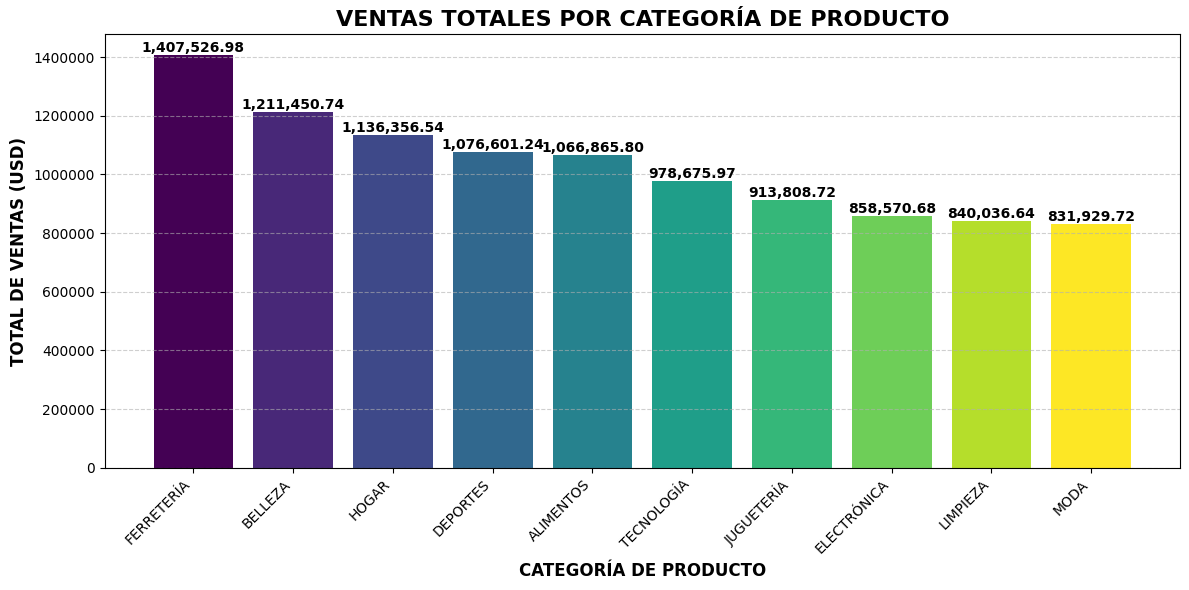

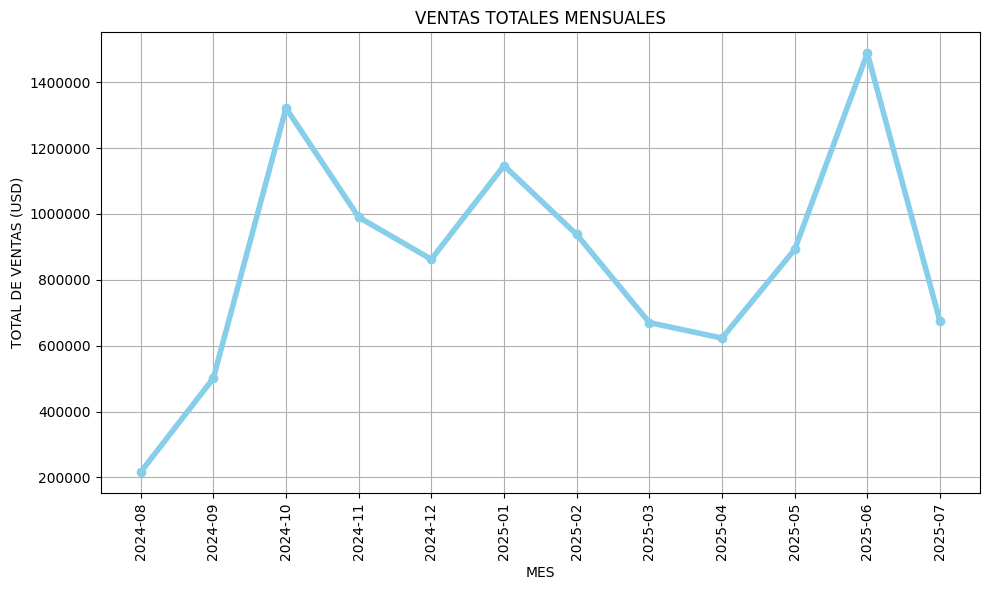

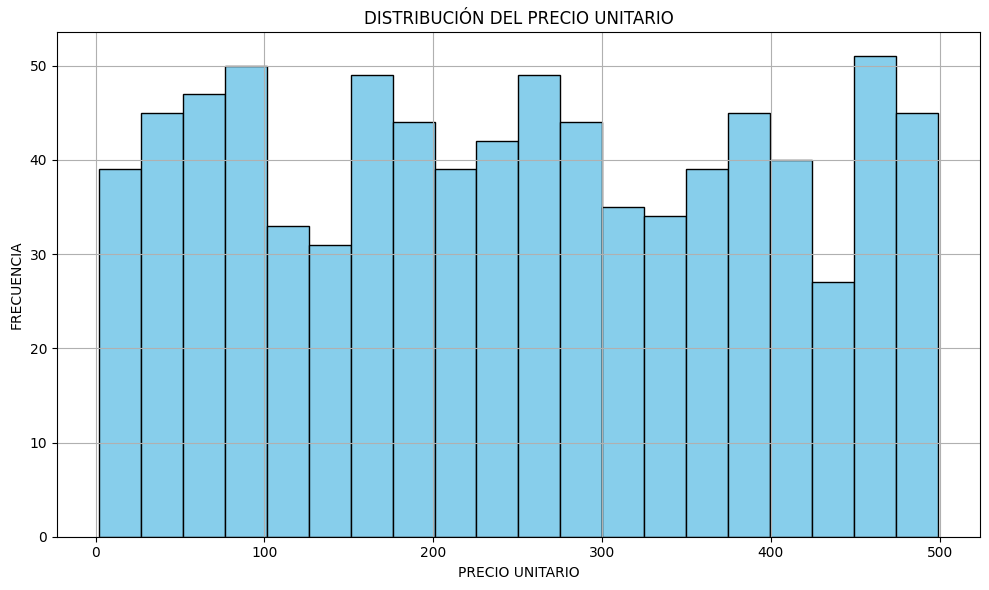

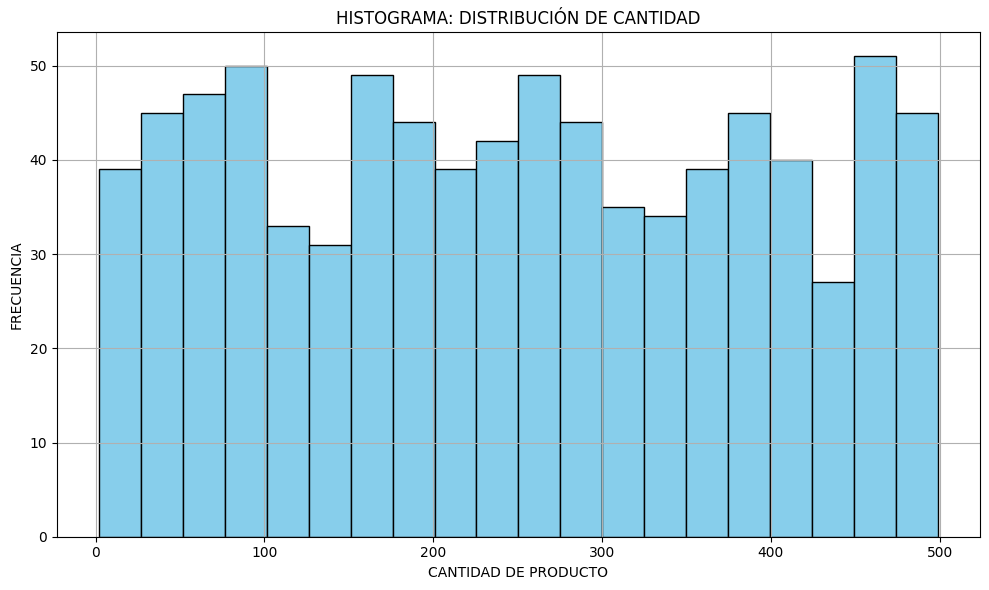

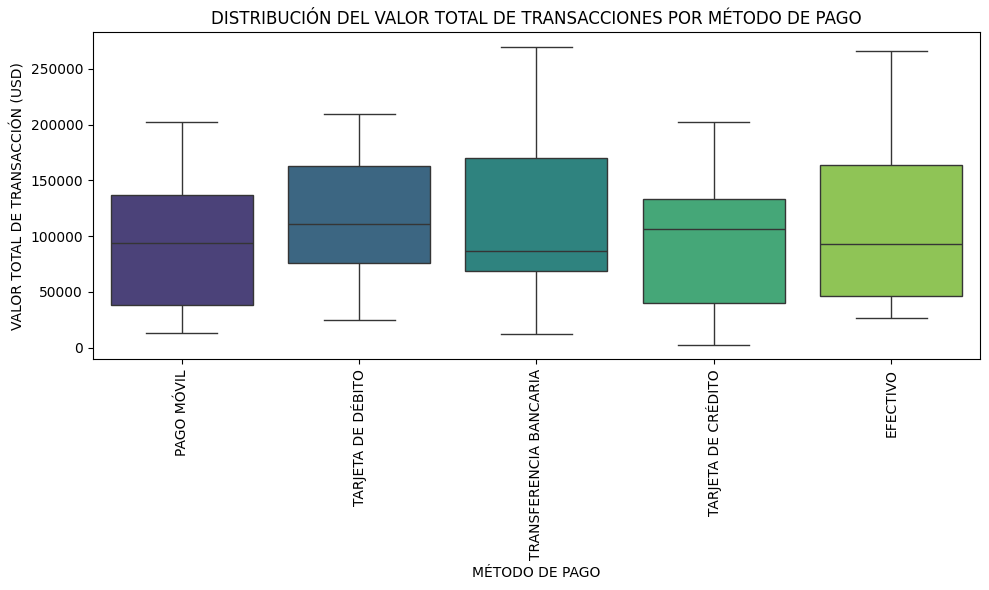

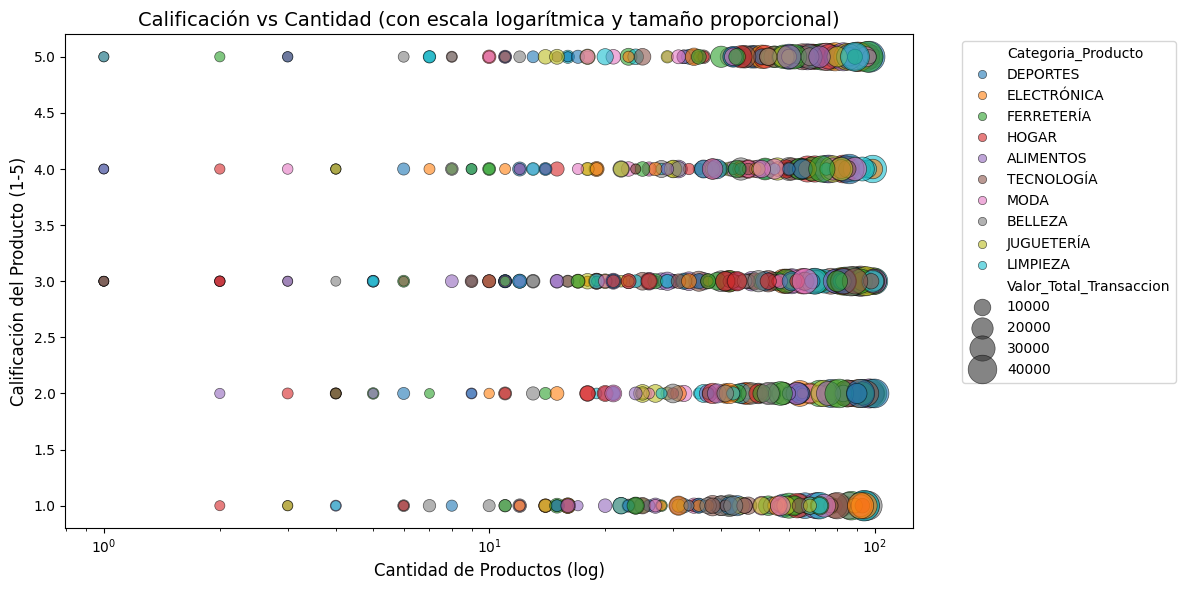

In [ ]:
# Ordenar el DataFrame por ventas totales (de mayor a menor)
ventas_ordenadas = ventas_por_categoria_prod.sort_values(
    by="Valor_Total_Transaccion", ascending=False
)

# Datos
categorias = ventas_ordenadas["Categoria_Producto"]
valores = ventas_ordenadas["Valor_Total_Transaccion"]

# Crear figura y colores (gradiente viridis)
plt.figure(figsize=(12, 6))
colores = plt.cm.viridis(numpy.linspace(0, 1, len(categorias)))
barras = plt.bar(categorias, valores, color=colores)

# Etiquetas num√©ricas encima de las barras
for barra in barras:
    plt.text(
        barra.get_x() + barra.get_width() / 2,
        barra.get_height(),
        f"{barra.get_height():,.2f}",
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight='bold'
    )

# Ajustes del gr√°fico
plt.title("VENTAS TOTALES POR CATEGOR√çA DE PRODUCTO", fontsize=16, fontweight='bold')
plt.xlabel("CATEGOR√çA DE PRODUCTO", fontsize=12, fontweight='bold')
plt.ylabel("TOTAL DE VENTAS (USD)", fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style="plain", axis="y")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Mostrar gr√°fico
plt.show()


# Un gr√°fico de l√≠neas de las ventas totales a lo largo del tiempo (por mes o a√±o).
analisis_mensual = (
    df_limpio.groupby(["Anio", "Mes_Numero"])["Valor_Total_Transaccion"]
    .sum()
    .reset_index(name="Valor_Total_Ventas")
)
analisis_mensual["Mes_Anio"] = (
    analisis_mensual["Anio"].astype(str)
    + "-"
    + analisis_mensual["Mes_Numero"].astype(str).str.zfill(2)
)
analisis_mensual = analisis_mensual.sort_values(by="Mes_Anio")
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(
    analisis_mensual["Mes_Anio"],
    analisis_mensual["Valor_Total_Ventas"],
    marker="o",
    color="skyblue",
    linewidth=4,
)
ax.ticklabel_format(style="plain", axis="y")
ax.set_xticks(analisis_mensual["Mes_Anio"])
ax.set_title("Ventas totales mensuales".upper())
ax.set_xlabel("Mes".upper())
ax.set_ylabel("Total de Ventas (USD)".upper())
ax.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Histograma: Distribuci√≥n del Precio Unitario o cantidad
plt.figure(figsize=(10, 6))
plt.hist(df_limpio["Precio_Unitario"].dropna(), bins=20, color="skyblue", edgecolor="black")
plt.title("Distribuci√≥n del Precio Unitario".upper())
plt.xlabel("Precio Unitario".upper())
plt.ylabel("Frecuencia".upper())
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df_limpio["Precio_Unitario"].dropna(), bins=20, color="skyblue", edgecolor="black")
plt.title("Histograma: Distribuci√≥n de cantidad".upper())
plt.xlabel("Cantidad de producto".upper())
plt.ylabel("Frecuencia".upper())
plt.grid(True)
plt.tight_layout()
plt.show()

# Boxplot: Valor Total de Transacci√≥n por M√©todo de Pago
transacciones_metodos = (
    df_limpio.groupby(["ID_Transaccion", "Metodo_Pago"])["Valor_Total_Transaccion"]
    .sum()
    .reset_index()
)
transacciones_metodos = transacciones_metodos.sort_values(
    by="ID_Transaccion", ascending=True
)
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=transacciones_metodos,
    x="Metodo_Pago",
    y="Valor_Total_Transaccion",
    palette="viridis",
    hue="Metodo_Pago",
    legend=False,
)
plt.title("Distribuci√≥n del Valor Total de Transacciones por M√©todo de Pago".upper())
plt.xlabel("M√©todo de Pago".upper())
plt.ylabel("Valor Total de Transacci√≥n (USD)".upper())
plt.xticks(rotation=90)
plt.tight_layout()
# Guardar figura
plt.savefig("BoxPlot")
plt.show()

# Scatter Plot: Calificaci√≥n vs Cantidad
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(
x="Cantidad_Producto",
y="Calificacion_Producto",
hue="Categoria_Producto",
data=df_limpio,
size="Valor_Total_Transaccion",
sizes=(50, 500),
alpha=0.6,
edgecolor='black',
linewidth=0.5,
ax=ax
)
ax.set_xscale("log")
ax.set_title("Calificaci√≥n vs Cantidad (con escala logar√≠tmica y tama√±o proporcional)", fontsize=14)
ax.set_xlabel("Cantidad de Productos (log)", fontsize=12)
ax.set_ylabel("Calificaci√≥n del Producto (1-5)", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()


# 7Ô∏è‚É£ Conclusiones y Reflexi√≥n

Al analizar la informaci√≥n del dataset propuesto, encontramos que solo existe un item/art√≠culos por transacci√≥n. En la vida real cuando una persona se va de compras, esta adquiere varios art√≠culos en una sola compra, por tal motivo se mejor√≥ la informaci√≥n del dataset haciendo lo siguiente: en cada transacci√≥n se gener√≥ varias compras de art√≠culos, tambi√©n cada transacci√≥n posee datos √∫nicos (fecha,ciudad,id_cliente) para mantener la consistencia de la informaci√≥n, por √∫ltimo agregamos informaci√≥n m√°s real en lo que se refiere a nombres de productos y categorias del producto al dataset.

Para realizar el ejercicio pr√°ctico planteado en la semana 1 experimentamos un gran desaf√≠o al programar en Python ya que ninguno de los integrantes hab√≠amos tenido experiencia en dicho lenguaje de programaci√≥n, por tal motivo tuvimos que investigar para solventar esa dificultad y cumplir con la tarea.  Otro dificultad hallada fue el cambiar de perspectiva con relaci√≥n a como se programa en otros lenguajes de programaci√≥n(Java, C#) versus Python. Hay varias instrucciones que nos dejan asombrados por la forma de hacer mucho en pocas l√≠neas de c√≥digo, todo gracias a sus robustas libraries. Tambi√©n pudimos evidenciar que Python al tener enteros de precisi√≥n arbitraria puede almacenar y hacer c√°lculos con cualquier clase de n√∫meros sin tener que preocuparse por errores de tama√±os de tipos(overflow) como sucede en otros lenguajes.  


## Preguntas
üü° ¬ø A que ciudad se envi√≥ mas productos?

üü° ¬ø El top 5 de los productos mas vendidos por regi√≥n del pais?

üü° ¬ø Productos preferidos por ciudad, region y pais?

Nota: Cada pregunta debe contener su gr√°fico.

## Recomendaciones

üü° Instalar todas las dependencias externas que sean necesarias para ejecutar el notebook.

üü° Revisar la documentaci√≥n de la API de Pandas para evitar errores en la manipulaci√≥n de los datos o referencias.

üü° Analizar mas a detalle el manejo de las libs para generar gr√°ficos m√°s estilizados y profesionales.  
 
üü° Si se requiere alguna modificaci√≥n del data set solo se debe Cambiar los valores de las constantes a requerimiento del cientifico de datos.  

# Puntos de Mejora
1Ô∏è‚É£Manejo de Nulos:                                                                  
 Se escogi√≥ el valor de la moda para llenar los valores nulos en la columna ciudad_envio por los siguientes razones:
 - Es un campo categ√≥rico (texto) y no tiene un orden num√©rico que permita calcular media o mediana.
 - La moda es estad√≠sticamente adecuada para atributos categ√≥ricos porque representa el valor m√°s com√∫n y esperado en la distribuci√≥n.
 - Usar la moda preserva el m√°ximo n√∫mero de registros, evitando el sesgo 

 Se escogi√≥ el valor de la moda para llenar los valores nulos en la columna calificaci√≥n_Producto por los siguientes razones:
 - Aunque es num√©rico, representa categor√≠as (1 a 5 estrellas, por ejemplo), por lo que la media puede no ser representativa porque podr√≠a tener una calificaci√≥n con decimales cuasando mas inconvenientes
 - Al imputar con la moda, se asigna a los valores faltantes el dato que m√°s se repite en el conjunto, lo que refleja el comportamiento mayoritario y mantiene la coherencia estad√≠stica de la variable.
 
2Ô∏è‚É£Validaci√≥n de datos num√©ricos Outlier
Se creo 2 variables condicion_producto y condicion_precio las cuales tienen las condiciones para mantener los datos v√°lidos en cuanto a la cantidad del producto y precio, esto se realiza para no recorrer 2 veces el dataset ya que se necesita guardar en otro dataset los registros a eliminar utilizando este signo (~) negamos la condici√≥n, luego mostramos las filas a eliminar del dataset.

3Ô∏è‚É£Ingenier√≠a de Caracter√≠sticas
Se creo la columna d√≠a de la semana como se puede evidenciar al imprimir el dataset df_limpio

4Ô∏è‚É£Calidad de las visualizaciones
* En el histograma donde se representa el Precio_Unitario y Cantidad se ajusto los bins para obtener una mejor visualizaci√≥n de los datos.
* Se utiliz√≥ Matplotlib en el gr√°fico ventas totales de categor√≠a del producto, mejorando significativamente la comprensi√≥n del gr√°fico.
* El scatter plot de "Calificaci√≥n del Producto vs. Cantidad" se mejor√≥ realizando lo siguiente:               
Eje X: Cantidad de Productos (log) ‚Üí Escala logar√≠tmica que facilita visualizar rangos amplios de cantidades.                        
Eje Y: Calificaci√≥n del Producto (1-5) ‚Üí Valores discretos entre 1 y 5.                                                
Tama√±o de las burbujas: Representa el Valor Total de la Transacci√≥n (mayor tama√±o = mayor valor monetario).                                         
Colores: Representan diferentes Categor√≠as de Producto (ej. DEPORTES, ELECTR√ìNICA, HOGAR, etc.).                                          

5Ô∏è‚É£Resultados obtenidos en el EDA
Los resultados est√°n sujetos a cambio ya que los datos se generan rand√≥micamente cada vez que se ejecuta la carga del dataset.
* En el primer gr√°fico correspondiente a ventas totales por categor√≠a del producto, nos se√±ala que la categor√≠a de electr√≥nica es la que m√°s a vendido con (1'191.294,71) y la categor√≠a de limpieza es la m√°s baja en ventas (839.564,99).
* En el segundo gr√°fico podemos evidenciar que en enero del 2025 es donde se vendi√≥ m√°s (1'600.000) d√≥lares.
* En el gr√°fico de transacciones por m√©todo de pago se observa que:
tarjeta de cr√©dito:	tiene una mediana alta, es el m√©todo de pago con transacciones m√°s elevadas en promedio. Tambi√©n tiene varios outliers de alto valor.           
Tarjeta de d√©bito:	Tiene una mediana moderada, pero una gran dispersi√≥n de valores. Hay transacciones de bajo valor y algunas muy altas.
Efectivo:	Presenta la mayor dispersi√≥n (bigotes m√°s largos), lo que indica transacciones muy variadas. Tiene valores bajos y altos.
Transferencia bancaria:	Aunque tiene valores bajos, su mediana y caja indican que la mayor√≠a de las transacciones son peque√±as a moderadas.
No hay una relaci√≥n clara entre la cantidad de productos comprados y la calificaci√≥n (se ven calificaciones bajas y altas en todos los rangos de cantidad).

* En el √∫ltimo gr√°fico Las categor√≠as con mayores valores de transacci√≥n (burbujas grandes) suelen concentrarse en calificaciones de 3 a 5, destacando FERRETER√çA, TECNOLOG√çA y HOGAR. La escala logar√≠tmica permite visualizar tanto productos con pocas unidades como con grandes cantidades. Hay muchos productos con calificaci√≥n 3, lo que podr√≠a indicar neutralidad o insatisfacci√≥n moderada. Existen productos mal calificados pero con alto valor o cantidad, lo que podr√≠a se√±alar oportunidades de mejora en calidad o servicio.
